<a href="https://colab.research.google.com/github/HowardHNguyen/Machine-Learning-Deep-Learning/blob/main/Linear_Regression_Predicting_Customer_Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting sales from advertising spend using Linear Regression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the relevant libraries for plotting and data manipulation, load
advertising.csv dataset into a pandas DataFrame, and print the top five
records using the following code:

In [6]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
advertising = pd.read_csv("/content/drive/MyDrive/_Python/Data-Science-for-Marketing-Analytics-Second-Ed/Chapter05/Datasets/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Visualize the association between TV and Sales through a scatter plot using the
following code:

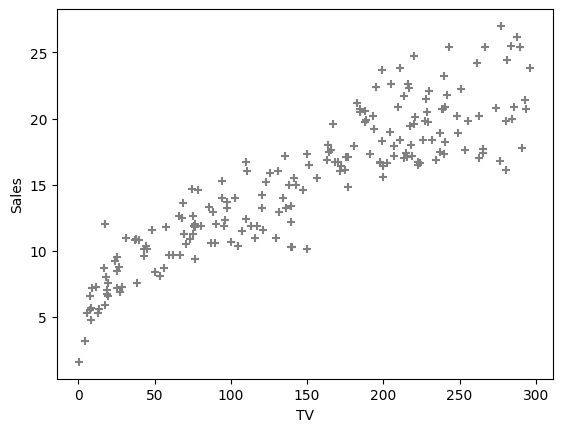

In [7]:
plt.scatter(advertising.TV, advertising.Sales, \
            marker="+", color='gray')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

As we can see from the preceding figure, TV spend clearly has a close
association with Sales – sales seem to increase as TV spend increases. Let us
use Sales to build the linear regression model.

In [8]:
# Import LinearRegression from sklearn and create an instance of LinearRegression using the following code:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(advertising[['TV']], advertising[['Sales']])

LinearRegression()

#### Plotting the relationship

In [10]:
sales_pred = lr.predict(advertising[['TV']])

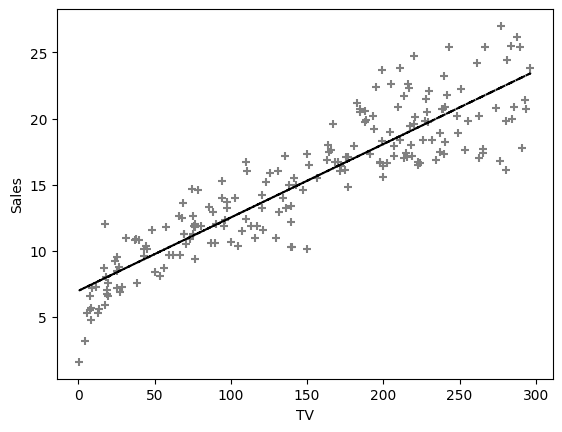

In [11]:
plt.plot(advertising.TV, sales_pred,"k--")
plt.scatter(advertising.TV, advertising.Sales, \
            marker='+', color='gray')
plt.xlabel("TV")
plt.ylabel('Sales')
plt.show()

As you can see, the regression line does a decent job of describing the relationship between sales and advertising spend on TV as a channel. From the line, you see that the sales increase very well together with the spend on TV advertising and that TV advertising can be a decent predictor of the expected sales. This tells HINA Inc. that this is a great channel for marketing investment.

Many problems in marketing are related to predicting a continuous outcome.
Therefore, regression has many different use cases in marketing. Predicting how much a customer will spend in the next year to assess customer value is one example. Predicting the sales for the next month for a store or all stores in a chain is another. Indeed, being able to predict quantities using machine learning is one of the most useful skills a data science professional in the marketing domain must possess. However, before you can perform the mathematical modeling through linear regression, you need to perform some other critical steps in the general predictive modeling process pipeline.

Let us begin by transforming the data and creating features/variables that will be useful for predicting your outcome. You will learn how to do this in the following section.

# FEATURE ENGINEERING FOR REGRESSION


Raw data is a term that is used to refer to the data as you obtain it from the source - without any manipulation from your side. Rarely, a raw dataset can directly be
employed for a modeling activity. Often, you perform multiple manipulations on data
and the act of doing so is termed feature engineering. In simple terms, feature
engineering is the process of taking data and transforming it into features for use in
predictions. There can be multiple motivations for feature engineering:

• Creating features that capture aspects of what is important to the outcome of interest (for example, creating an average order value, which could be more useful for predicting revenue from a customer, instead of using the number of orders and total revenue)

• Using your domain understanding (for example, flagging certain high-value indicators for predicting revenue from a customer)

• Aggregating variables to the required level (for example, creating customer-level features for predicting revenue from customers)

This process requires both data expertise and domain knowledge – you need to know what can be done with the data that you have, as well as knowledge of what might be predictive of the outcome you're interested in.

Once the features are created, they need to be assessed from the lens of not just a data analyst but also from a business perspective. In most marketing cases, the outcome of the modeling activity must make sense to businesses that will be making decisions using the model. This can be done by simply looking for relationships between the features and the outcome of interest.

We will first look at how to transform data to create features, and then how to clean the data of the resulting features to ensure models are trained on high-quality data in the following sections.

# **Feature Creation**
To perform a regression, you first need data to be in a format that allows regression.
In many cases, data is in the form of customer transactions. The data needs to be transformed into features that can be used to perform a prediction. These features then become your predictors.

Features are transformed versions of the data that capture what you think is
possibly predictive of the outcome of interest. Let's say you are trying to predict the future value of a customer (that is, how much you expect a customer to spend on a company's product in the future), examples of useful features might include the number of purchases a customer has made previously, the amount they have spent, or the time since their last order.

# **CREATING FEATURES FOR CUSTOMER REVENUE PREDICTION**


Azra is a big high-fashion retailer with operations in multiple countries. To optimize their marketing activities, Azra seeks to identify high-value customers – customers that are expected to bring high revenue to the retailer – and have a differential marketing strategy for them. You are a marketing analytics manager at Azra and have a solution to this business problem. The key idea is that a predictive model can be employed to predict the next year's revenue of the customer based on the previous year's purchases. A customer with higher predicted revenue is naturally
a higher-value customer.

To validate this approach, you plan to build a model to predict the revenue of the customer in 2020 based on the purchases made in 2019. If the model performs well, the approach gets validated. The 2020 purchase data can then be used to predict customer revenue for 2021 and help the company identify high-value customers.

In [14]:
import pandas as pd
import datetime as dt
df = pd.read_csv('/content/drive/MyDrive/_Python/Data-Science-for-Marketing-Analytics-Second-Ed/Chapter05/Datasets/azra_retail_transactions.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom


The goal of this exercise is to manipulate the data and create variables that will allow you to model the customer spend for the year 2020, based on the past activity.
The total customer spends for 2020 will therefore be the dependent variable. The
independent variables will be features that capture information about the customer's past purchase behavior. Note that this also requires aggregation of the data in order to get one record for each customer.

More concretely, you will be creating the following variables from the
transactions data:

• revenue_2019 (total revenue for the year 2019)

• days_since_first_purchase (the number of days since the first purchase
by the customer)

• days_since_last_purchase (the number of days since the customer's
most recent purchase)

• number_of_purchases (the total number of purchases by the customer
in 2019)

• avg_order_cost (the average value of the orders placed by the customer
in 2019)

• revenue_2020 (the total revenue for the year 2020)

revenue_2020 will be the **dependent variable in the model**, the rest being the
independent variables.

In [15]:
# Convert the InvoiceDate column to date format using the to_datetime method from pandas:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [16]:
# Calculate the revenue for each row, by multiplying Quantity by UnitPrice.
# Print the first five records of the dataset to verify the result:
df['revenue'] = df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom,15.0
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom,7.5
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom,20.4
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom,11.8
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom,16.5


In the dataset, each invoice could be spread over multiple rows, one for each type of product purchased (since the row is for each product, and a customer can buy multiple products in an order). These can be combined such that data for each transaction is on a single row. To do so, perform a groupby operation on InvoiceNo. However, before that, you need to specify how to combine those rows that are grouped together.

In [17]:
operations = {'revenue':'sum','InvoiceDate':'first','CustomerID':'first'}
df = df.groupby('InvoiceNo').agg(operations)

We will have **first specified the aggregation functions** that you will use for each column and **then performed a groupby operation**.
InvoiceDate and CustomerID will be the same for all rows for the same invoice, so you can just take the first entry for them. For revenue, you need to add the revenue across all items for the same invoice to get the total revenue for that invoice.

In [18]:
df.head()

,revenue,InvoiceDate,CustomerID
InvoiceNo,,,
536365,139.12,2019-12-01 08:26:00,17850.0
536366,22.20,2019-12-01 08:28:00,17850.0
536367,278.73,2019-12-01 08:34:00,13047.0
536368,70.05,2019-12-01 08:34:00,13047.0
536369,17.85,2019-12-01 08:35:00,13047.0


You will be using the year of the transaction to derive features for 2019 and 2020. Create a separate column named year for the year. To do that, use the year attribute of the InvoiceDate column, as follows:

In [19]:
df['year'] = df['InvoiceDate'].dt.year

For each transaction, calculate how many days' difference there is between
the last day of 2019 and the invoice date using the following code. Use the
datetime module we imported earlier:

In [20]:
df['days_since'] = (dt.datetime(year=2019, month=12, day=31) - df['InvoiceDate']).apply(lambda x: x.days)

Next, create the features for days since the first and last purchase, along with
the number of purchases and total revenue for 2019. Define a set of aggregation
functions for each of the variables and apply them using the groupby method.
You will calculate the sum of revenue. For the days_since column, you
will calculate the maximum and the minimum number of days, as well as the
number of unique values (giving you how many separate days this customer
made a purchase on). Since these are your predictors, store the result in a
variable, X

In [21]:
operations = {'revenue':'sum','days_since':['max','min','nunique']}

X = df[df['year'] == 2019].groupby('CustomerID').agg(operations)

X.head()

revenue days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1

As you can see from the preceding figure, because you performed multiple types
of aggregation on the days_since column, you ended up with multi-level
column labels.
To simplify this, reset the names of the columns to make them easier to refer to
later. Use the following code and print the results using the head function:

In [22]:
X.columns = [' '.join(col).strip() for col in X.columns.values]

In [23]:
X.head(5)

,revenue sum,days_since max,days_since min,days_since nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


Derive one more feature: the average spend per order. Calculate this by dividing
revenue sum by days_since nunique (note that this is the average spend
per day. For simplicity, assume that a customer only makes one order in a day):

In [24]:
X['avg_order_cost'] = X['revenue sum']/X['days_since nunique']

You need the outcome that you will be predicting, which is just the sum of
revenue for 2020. Calculate this with a simple groupby operation and store the
values in the y variable, as follows:

In [25]:
y = df[df['year'] == 2020].groupby('CustomerID')['revenue'].sum()

Put your predictors and outcomes into a single DataFrame, wrangled_df, and
rename the columns to have more intuitive names. Finally, look at the resulting
DataFrame, using the head function:

In [26]:
wrangled_df = pd.concat([X,y], axis=1)
wrangled_df.columns = ['revenue_2019',\
                       'days_since_first_purchase',\
                       'days_since_last_purchase',\
                       'number_of_purchases',\
                       'avg_order_cost',\
                       'revenue_2020']

wrangled_df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


In [27]:
# To drop the customers without values, drop rows where either of the revenue columns are null, as follows:
wrangled_df = wrangled_df[~wrangled_df.revenue_2019.isnull()]
wrangled_df = wrangled_df[~wrangled_df.revenue_2020.isnull()]

As a final data-cleaning step, it's often a good idea to get rid of outliers. A
standard definition is that an outlier is any data point more than three standard deviations above the median. Use this criterion to drop customers that are outliers in terms of 2019 or 2020 revenue:

In [28]:
wrangled_df = wrangled_df[wrangled_df.revenue_2020 \
               < ((wrangled_df.revenue_2020.median()) \
               + wrangled_df.revenue_2020.std()*3)]
wrangled_df = wrangled_df[wrangled_df.revenue_2019 \
              < ((wrangled_df.revenue_2019.median()) \
                 + wrangled_df.revenue_2019.std()*3)]

It's often a good idea after you've done your data cleaning and feature
engineering, to save the new data as a new file, so that, as you're developing
your model, you don't need to run the data through the whole feature
engineering and cleaning pipeline each time you want to rerun your code. You
can do this using the to_csv function. Also, take a look at your final DataFrame
using the head function:

In [29]:
wrangled_df.to_csv('/content/drive/MyDrive/_Python/Data-Science-for-Marketing-Analytics-Second-Ed/Chapter05/Datasets/wrangled_transactions.csv')
wrangled_df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


The output above confirms that we have successfully manipulated the
data and created the variables (dependent and independent) from the raw
transaction data. This dataset is now in a format conducive to the steps involved in the modeling process.

## **Examining Relationships between Predictors and Outcome**

In [30]:
df = pd.read_csv('/content/drive/MyDrive/_Python/Data-Science-for-Marketing-Analytics-Second-Ed/Chapter05/Datasets/wrangled_transactions.csv', \
                 index_col='CustomerID')
df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


Using the plot method of the pandas DataFrame, make a scatter plot with
days_since_first_purchase on the x axis and revenue_2020 on the y
axis to examine the relationship between them:

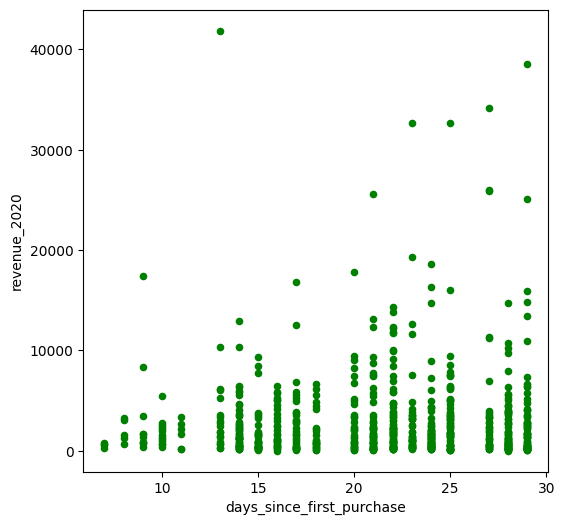

In [31]:
df.plot.scatter(x="days_since_first_purchase", y="revenue_2020", figsize=[6,6], color='green')
plt.show()

We can see that while there is not a very strong correlation between them, in
general, we see higher instances of high revenue for customers with higher
tenure (a higher value for days_since_first_purchase).

In [32]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


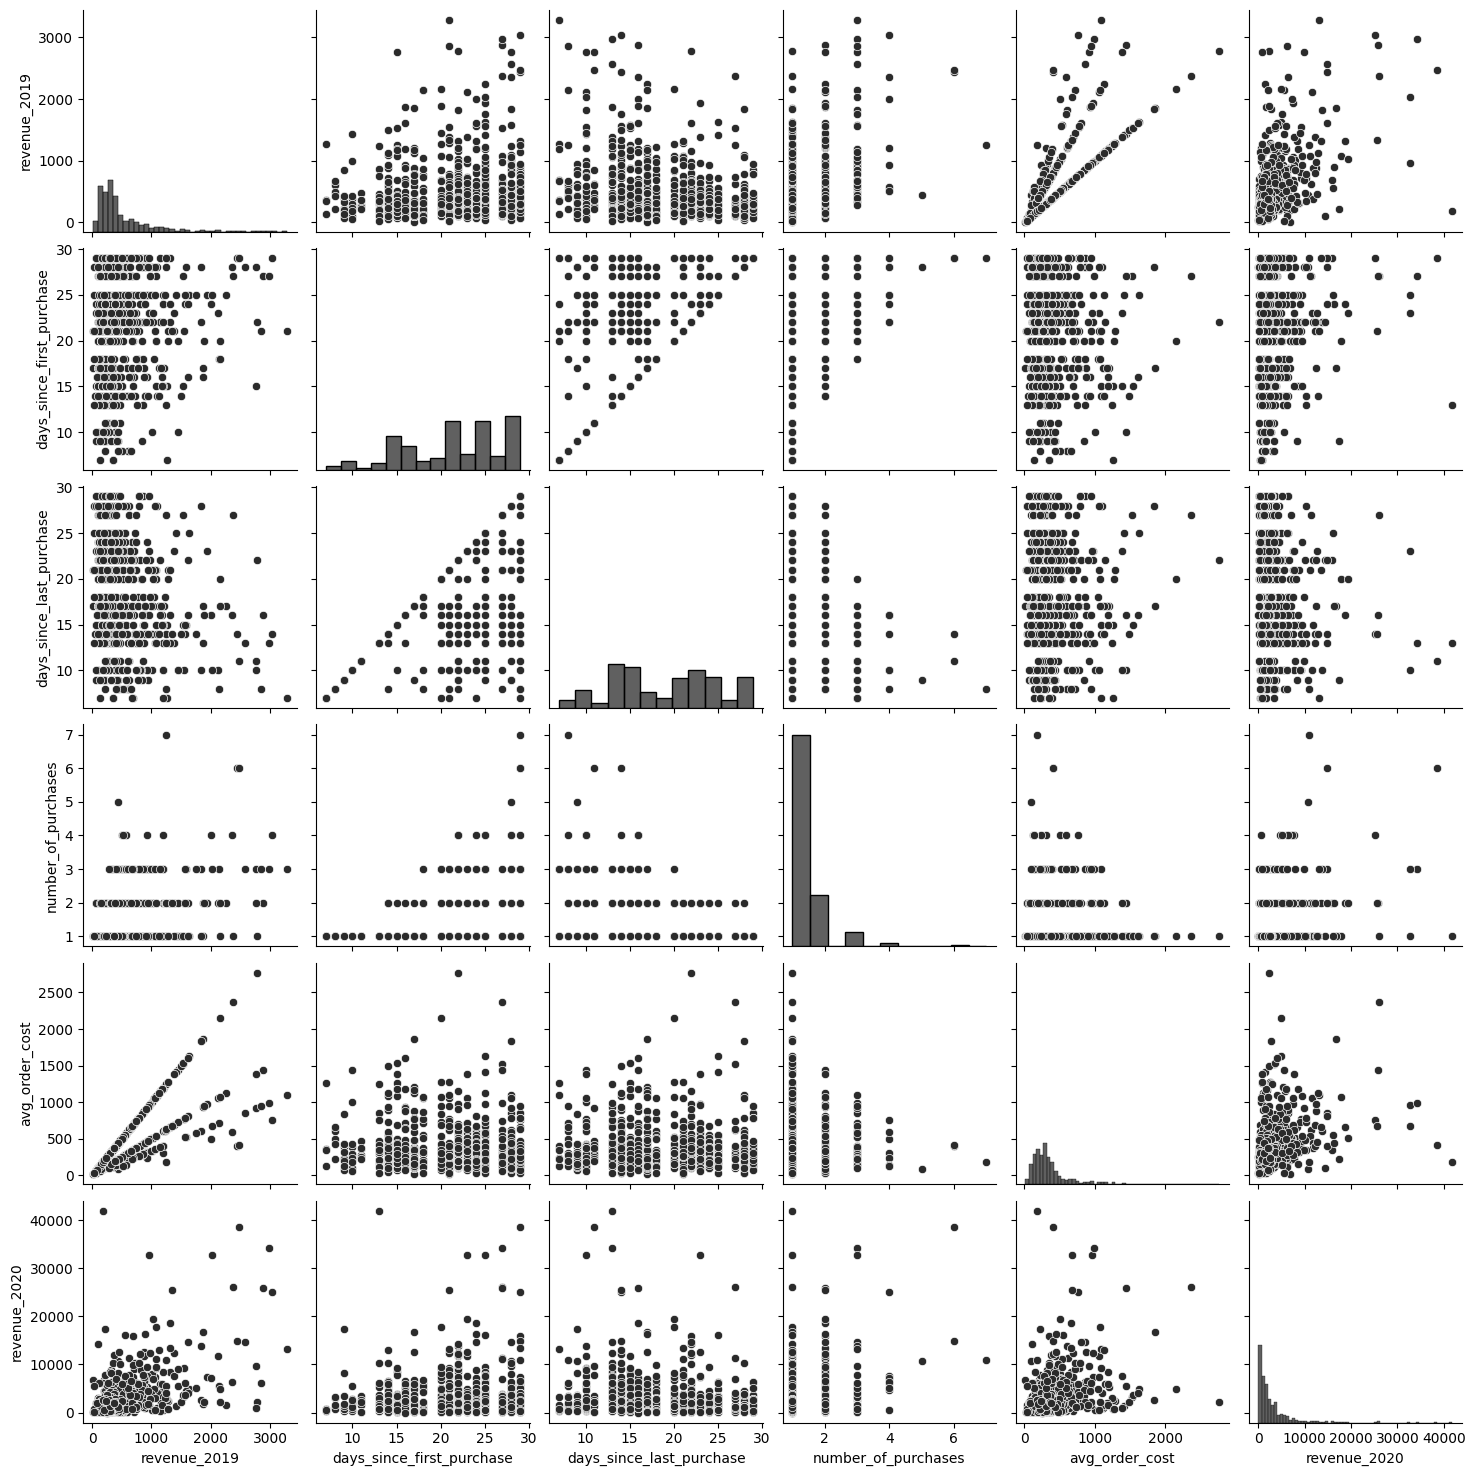

In [33]:
# Using the pairplot function of the seaborn library, create pairwise scatter plots of all the features. Use the following code:
import seaborn as sns
sns.set_palette('Greys_r')
sns.pairplot(df)
plt.show()

The above diagonal shows a histogram for each variable, whereas each
row shows the scatter plot between one variable and each other variable. The
bottom row of the figures shows the scatter plots of the 2020 revenue (our
outcome of interest) against each of the other variables. Because the data
points are overlapping and there is a fair amount of variance, the relationships
do not look very clear in the visualizations. Spend some time on this image and
understand the associations in the data.

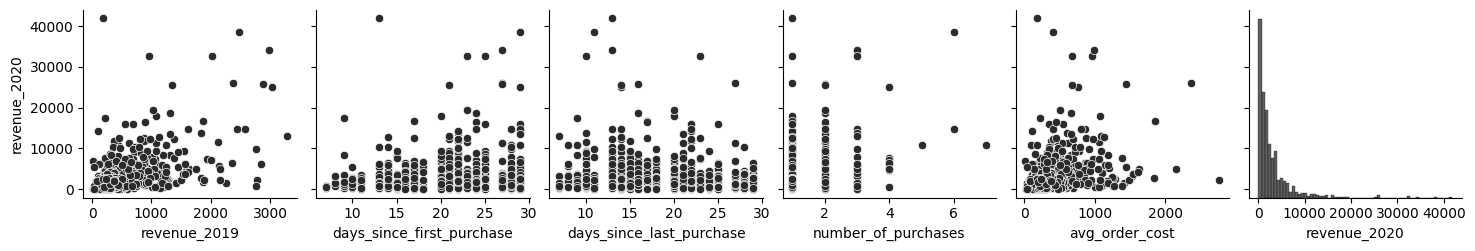

In [34]:
# Using the pairplot function and the y_vars parameter, limit the view to the row for your target variable, that is, revenue_2020:
sns.pairplot(df, x_vars=df.columns, y_vars="revenue_2020")
plt.show()

From this view focused on the associations between revenue_2020 and
the independent variables, you visually assess that none of the predictors
have a strong relationship with the customer revenue for 2020. The strongest
relationship seems to be with revenue_2019 and it is a positive relationship.

In [35]:
# Next, use correlations to quantify the associations between the variables. Use the corr method on the pandas DataFrame
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


Again, you can look at the last row to see the relationships between your
predictors and the outcome of interest (2020 revenue). Positive numbers
indicate a positive relationship – for instance, the higher the 2019 revenue
from a customer, the greater the expected revenue from them in 2020 should
be. Negative numbers mean the reverse – for example, the more days there
have been since a customer's last purchase, the lower you would expect
the 2020 revenue from them to be. The correlation values agree with the
visual assessment that revenue_2019 has the strongest relationship with
revenue_2020.

## **Building a Linear Model Predicting Customer Spend**
Predicting the future revenue for a customer based on past transactions is a classic
problem that linear regression can solve. In this exercise, you will create a linear
regression model to predict customer revenue for 2020 for the high-fashion company
Azra. In the previous exercises, you performed feature engineering to get the data
ready for modeling and analyzed the relationships in the data. Now, using linear
regression, you will create a model that describes how future revenue relates to the
features based on past transactions.

In [36]:
df = pd.read_csv('/content/drive/MyDrive/_Python/Data-Science-for-Marketing-Analytics-Second-Ed/Chapter05/Datasets/wrangled_transactions.csv', \
                 index_col='CustomerID')

In [37]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


In [38]:
# Store the independent and dependent variables in the X and y variables, respectively:
X = df[['revenue_2019',\
        'days_since_last_purchase',\
        'number_of_purchases',\
        'avg_order_cost']]

y = df['revenue_2020']

In [39]:
# Use sklearn to perform a train-test split on the data, so that we can assess the model on a dataset it was not trained on:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [40]:
# Import LinearRegression from sklearn using the following code:
from sklearn.linear_model import LinearRegression
# create a LinearRegression model and fit it on the training data:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Examine the model coefficients by checking the coef_ property. Note that these
are in the same order as your X columns: revenue_2019, days_since_last_purchase, number_of_purchases, and avg_order_cost:

In [41]:
model.coef_

array([  5.78799016,   7.47737544, 336.60769871,  -2.0558923 ])

Check the intercept term of the model by checking the intercept_ property:

In [42]:
model.intercept_

264.8693265705974

In [43]:
# revenue_2020 = 264.86 + 5.79*(revenue_2019) + 7.477*(days_since_last_purchase) + 336.61*(number_of_purchases) - 2.056*(avg_order_cost)

We can now use the fitted model to make predictions about a customer outside
of your dataset. Make a DataFrame that holds data for one customer, where
revenue for 2019 is 1,000, the number of days since the last purchase is 20,
the number of purchases made is 2, and the average order cost is 500. Have the
model make a prediction on this one customer's data:

In [44]:
single_customer = pd.DataFrame({
    'revenue_2019': [1000],
    'days_since_last_purchase': [20],
    'number_of_purchases': [2],
    'avg_order_cost': [500]
})

model.predict(single_customer)
# The result should be an array with a single value of about 5847.67, indicating
# the predicted revenue for 2020 for a customer with this data.

array([5847.67624446])

We can plot the model's predictions on the test set against the true value.
First, import matplotlib, and make a scatter plot of the model predictions on
X_test against y_test. Limit the x and y axes to a maximum value of 10,000
so that we get a better view of where most of the data points lie. Finally, add a line with slope 1, which will serve as your reference—if all the points lie on this line, it means you have a perfect relationship between your predictions and the true answer:

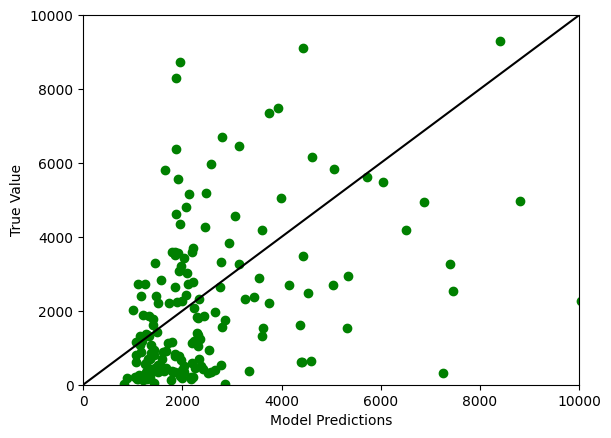

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test), y_test, color='green')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

the line indicates where points would lie if the prediction was the same as the true value. Since many of your points are quite far from the line, this indicates that the model is not completely accurate. However, there does seem to be some relationship, with higher model predictions having higher true values.

To further examine the relationship, we can use correlation. Use the corrcoef
method from NumPy to calculate the correlation between the predicted and the
actual values of revenue_2020 for the test data:

In [46]:
np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.61257401],
       [0.61257401, 1.        ]])

The correlation value is roughly 0.613. This is a fairly strong relationship, telling us that the model does a decent job of predicting the future revenue for the customer based on the past year's transactions.